# Subplots

In [9]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

params = {"ytick.color" : "w",
          "xtick.color" : "w",
          "axes.labelcolor" : "w",
          "axes.edgecolor" : "y",
          "axes.facecolor" : "None",
          "text.color" : 'w'}
plt.rcParams.update(params)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


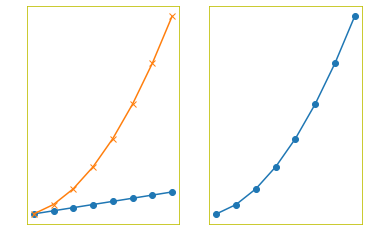

In [58]:
plt.figure()
# subplot with 1 row, 2 columns, and current axis is 1st subplot axes
plt.subplot(1, 2, 1)

linear_data = np.array([1,2,3,4,5,6,7,8])
plt.plot(linear_data, '-o')

exponential_data = linear_data**2 
# subplot with 1 row, 2 columns, and current axis is 2nd subplot axes
plt.subplot(1, 2, 2)
plt.plot(exponential_data, '-o')

# plot exponential data on 1st subplot axes
plt.subplot(1, 2, 1)
plt.plot(exponential_data, '-x')

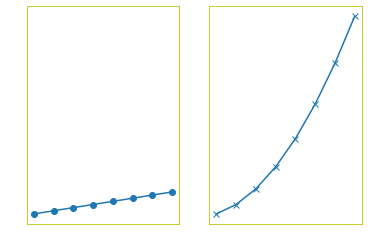

In [59]:
plt.figure()
ax1 = plt.subplot(1, 2, 1)
plt.plot(linear_data, '-o')
# pass sharey=ax1 to ensure the two subplots share the same y axis
ax2 = plt.subplot(1, 2, 2, sharey=ax1)
plt.plot(exponential_data, '-x')

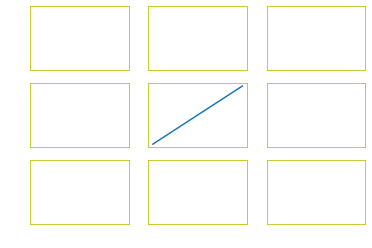

In [60]:
# create a 3x3 grid of subplots
fig, ((ax1,ax2,ax3), (ax4,ax5,ax6), (ax7,ax8,ax9)) = plt.subplots(3, 3, sharex=True, sharey=True)
# plot the linear_data on the 5th subplot axes 
ax5.plot(linear_data, '-')

# Histograms

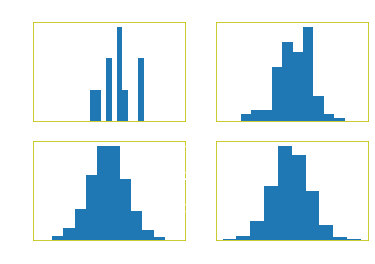

In [61]:
# create 2x2 grid of axis subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True)
axs = [ax1,ax2,ax3,ax4]

# draw n = 10, 100, 1000, and 10000 samples from the normal distribution and plot corresponding histograms
for n in range(0,len(axs)):
    sample_size = 10**(n+1)
    sample = np.random.normal(loc=0.0, scale=1.0, size=sample_size)
    axs[n].hist(sample)
    axs[n].set_title('n={}'.format(sample_size))

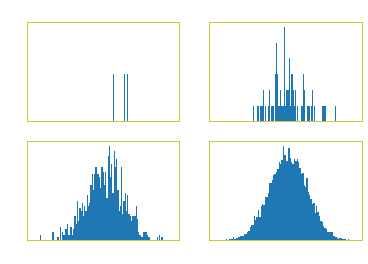

In [62]:
# repeat with number of bins set to 100
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True)
axs = [ax1,ax2,ax3,ax4]

for n in range(0,len(axs)):
    sample_size = 10**(n+1)
    sample = np.random.normal(loc=0.0, scale=1.0, size=sample_size)
    axs[n].hist(sample, bins=100)
    axs[n].set_title('n={}'.format(sample_size))

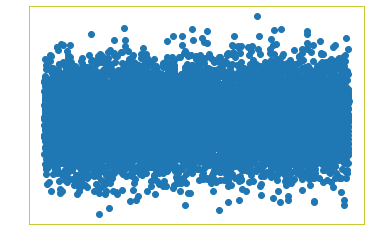

In [63]:
plt.figure()
Y = np.random.normal(loc=0.0, scale=1.0, size=10000)
X = np.random.random(size=10000)
plt.scatter(X,Y)

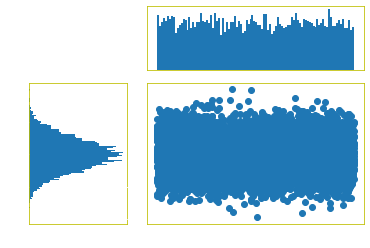

In [64]:
# use gridspec to partition the figure into subplots
import matplotlib.gridspec as gridspec

plt.figure()
gspec = gridspec.GridSpec(3, 3)

top_histogram = plt.subplot(gspec[0, 1:])
side_histogram = plt.subplot(gspec[1:, 0])
lower_right = plt.subplot(gspec[1:, 1:])

#Now fill it with data
Y = np.random.normal(loc=0.0, scale=1.0, size=10000)
X = np.random.random(size=10000)
lower_right.scatter(X, Y)
top_histogram.hist(X, bins=100)
s = side_histogram.hist(Y, bins=100, orientation='horizontal')

# Box and Whisker Plots

In [65]:
import pandas as pd
normal_sample = np.random.normal(loc=0.0, scale=1.0, size=10000)
random_sample = np.random.random(size=10000)
gamma_sample = np.random.gamma(2, size=10000)

df = pd.DataFrame({'normal': normal_sample, 
                   'random': random_sample, 
                   'gamma': gamma_sample})

In [66]:
df.describe()

,normal,random,gamma
count,10000.000000,10000.000000,10000.000000
mean,-0.008945,0.501794,1.998551
std,0.991206,0.289405,1.408570
min,-3.397190,0.000113,0.013696
25%,-0.679447,0.251911,0.959185
50%,-0.005413,0.505310,1.683994
75%,0.652837,0.751428,2.692646
max,3.513593,0.999915,12.099688


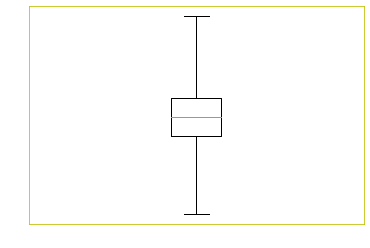

In [79]:
plt.figure()
# create a boxplot of the normal data, assign the output to a variable to supress output
_ = plt.boxplot(df['normal'], whis=[0, 100])

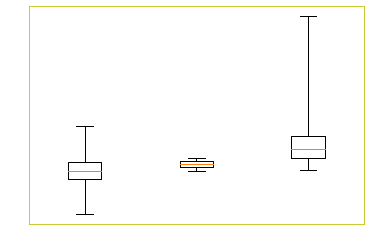

In [81]:
# plot boxplots for all three of df's columns
_ = plt.boxplot([ df['normal'], df['random'], df['gamma'] ], whis=[0, 100])

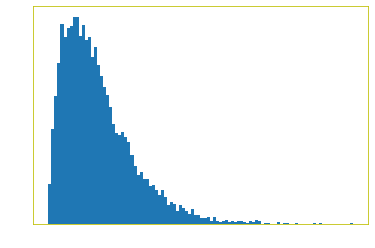

In [69]:
plt.figure()
_ = plt.hist(df['gamma'], bins=100)

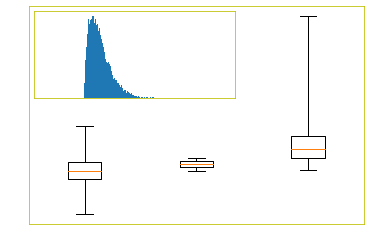

In [83]:
import mpl_toolkits.axes_grid1.inset_locator as mpl_il

plt.figure()
plt.boxplot([ df['normal'], df['random'], df['gamma'] ], whis=[0, 100])
# overlay axis on top of another 
ax2 = mpl_il.inset_axes(plt.gca(), width='60%', height='40%', loc=2)
ax2.hist(df['gamma'], bins=100)
ax2.margins(x=0.5)
# switch the y axis ticks for ax2 to the right side
ax2.yaxis.tick_right()

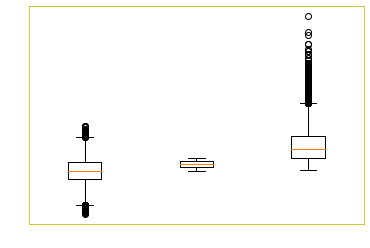

In [72]:
# if `whis` argument isn't passed, boxplot defaults to showing 1.5*interquartile (IQR) whiskers with outliers
plt.figure()
_ = plt.boxplot([ df['normal'], df['random'], df['gamma'] ] )

# Heatmaps

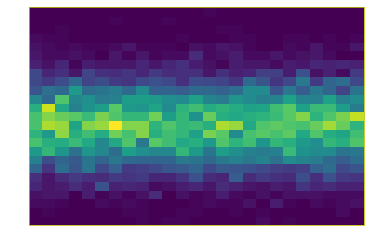

In [73]:
plt.figure()

Y = np.random.normal(loc=0.0, scale=1.0, size=10000)
X = np.random.random(size=10000)
_ = plt.hist2d(X, Y, bins=25)

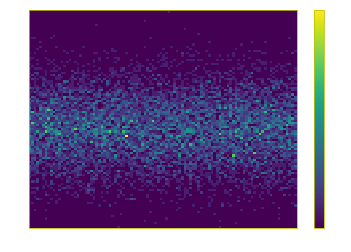

In [87]:
plt.figure()
_ = plt.hist2d(X, Y, bins=100)

# add a colorbar legend
plt.colorbar();

# Animations

In [5]:
from matplotlib import rc, animation

x = np.random.randn(n)

In [6]:
# create the function that will do the plotting, where curr is the current frame
def update(curr):
    plt.cla()
    plt.axis([-4,4,0,30])
    ax.set_title('Sampling the Normal Distribution')
    ax.set_ylabel('Frequency')
    ax.set_xlabel('Value')
    bins = np.arange(-4, 4, 0.5)
    plt.annotate(f'n = {curr}', [3,27])
    plot = plt.hist(x[:curr], bins=bins)
    return plot

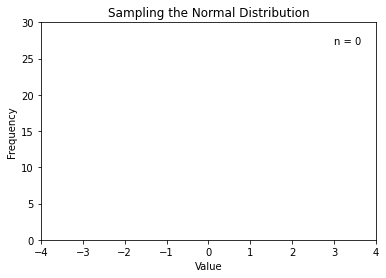

In [7]:
fig = plt.figure()
ax = plt.axes()
anim = animation.FuncAnimation(fig, update,interval=100)

# Note: below is the part which makes it work on Colab
rc('animation', html='jshtml')
anim

# Interactivity

5

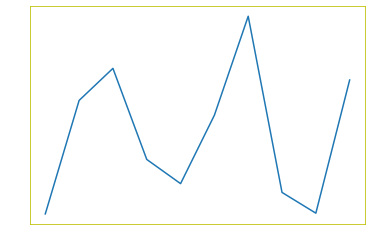

In [10]:
plt.figure()
data = np.random.rand(10)
plt.plot(data)

def onclick(event):
    plt.cla()
    plt.plot(data)
    plt.gca().set_title('Event at pixels {},{} \nand data {},{}'.format(event.x, event.y, event.xdata, event.ydata))

# tell mpl_connect we want to pass a 'button_press_event' into onclick when the event is detected
plt.gcf().canvas.mpl_connect('button_press_event', onclick)

In [ ]:
from random import shuffle
origins = ['China', 'Brazil', 'India', 'USA', 'Canada', 'UK', 'Germany', 'Iraq', 'Chile', 'Mexico']

shuffle(origins)

df = pd.DataFrame({'height': np.random.rand(10),
                   'weight': np.random.rand(10),
                   'origin': origins})
df

In [ ]:
plt.figure()
# picker=5 means the mouse doesn't have to click directly on an event, but can be up to 5 pixels away
plt.scatter(df['height'], df['weight'], picker=5)
plt.gca().set_ylabel('Weight')
plt.gca().set_xlabel('Height')

In [ ]:
def onpick(event):
    origin = df.iloc[event.ind[0]]['origin']
    plt.gca().set_title('Selected item came from {}'.format(origin))

# tell mpl_connect we want to pass a 'pick_event' into onpick when the event is detected
plt.gcf().canvas.mpl_connect('pick_event', onpick)